# **Omdena Liverpool Chapter: Vehicle Analysis & Prediction using Machine Learning**

In-depth analysis of vehicles involved in collisions and create a model to predict the likelihood of specific cohorts being involved in a collision.

Data Overview:

The data come from the Open Data website of the UK government, where they have been published by the Department of Transport.

Initially, the vehicle dataset has been cleaned by removing null values with simple imputations.

simple_impute_vehicle_data.parquet: every line in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns. Date range: 2004-2016. ~1.6 million records. 
Reference: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/995423/stats20-2011.pdf


EDA:
  - know statistical summary
  - find if missing values exist and analyze solutions to handle properly
  - discover if the data is skewed
  - perform correlation
  - note possible important features
  - answer some questions


39 Features 

        'Accident_Index': unique accident id
        'Towing_and_Articulation':
        'Vehicle_Leaving_Carriageway':
        'Vehicle_LocationRestricted_Lane':
        'Vehicle_Manoeuvre': vehicle entering or leaving the road, taking turns 
        'Vehicle_Reference': unique reference id of vehicle
        'Vehicle_Type': vehicle is either a  car, van, and so on 
        'X1st_Point_of_Impact':
        'Year': year of accident
        'Age_Band_of_Driver_missing': was the value for age band of driver missing before imputation
        'Age_of_Vehicle_missing': was the value for age of vehicle missing before imputation
        'Driver_Home_Area_Type_missing':was the value for driver home are type missing before imputation
        'Driver_IMD_Decile_missing': was the value for driver IMD decile missing before imputation
        'Engine_Capacity_.CC._missing':was the value for engine capacity missing before imputation
        'Hit_Object_in_Carriageway_missing': was the value for Object_in_Carriageway missing before imputation
        'Hit_Object_off_Carriageway_missing':was the value for Object_off_Carriageway missing before imputation
        'Journey_Purpose_of_Driver_missing':was the value for Journey_Purpose_of_Driver missing before imputation
        'Junction_Location_missing':was the value for Junction_Location missing before imputation
        'make_missing':was the value for make missing before imputation
        'model_missing':was the value for model type of vehicle missing before imputation
        'Propulsion_Code_missing':was the value for Propulsion_Code missing before imputation
        'Sex_of_Driver_missing':was the value for sex missing before imputation
        'Skidding_and_Overturning_missing':was the value for Skidding_and_Overturning missing before imputation
        'Was_Vehicle_Left_Hand_Drive_missing':was the value for driver being right or left handed missing before imputation
        'Age_of_Vehicle': current age of vehicle when involved in accident
        'Engine_Capacity_.CC.': engine capacity of vehicle
        'Age_Band_of_Driver': age of driver in a given range
        'Driver_Home_Area_Type': home area type of driver
        'Driver_IMD_Decile': IMD decile of driver
        'Hit_Object_in_Carriageway':
        'Hit_Object_off_Carriageway',
        'Journey_Purpose_of_Driver',
        'Junction_Location',
        'make': manufacturer of the vehicle
        'model': model number of the vehicle
        'Propulsion_Code',
        'Sex_of_Driver': driver's gender
        'Skidding_and_Overturning',
        'Was_Vehicle_Left_Hand_Drive': if a driver was right or left handed


# 1. Connecting to the file and performing EDA

### 1.1 Connecting to the google drive for accessing the processed dataset.

In [ ]:
## -------------------------------------------------------------------------------------------------------------
## To run this notebook in google colab:
## 0. Create a folder named: dataset into the root directory called as MyDrive 
##    in the google drive
## 1. Goto:
##    https://drive.google.com/drive/folders/1-8u-WfSxBCKbfahcwgEPPdPUqtuhLWYw
## 2. Right click the simple_impute_vehicle_data.parquet file and select Add 
##    shortcut to drive, then navigate the
##    pop up to select the dataset folder
## 3. Finally, run the notebook in colab and on a pop asking permission to 
##    connect to the drive, hit allow access(select the google account which has
##    the above dataset file)
## --------------------------------------------------------------------------------------------------------------

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 1.2. Setting Path for the Vehicle dataset

In [ ]:
SIMPLE_IMPUTE_VEHICLE_PATH = "/content/drive/MyDrive/Omdena_Liverpool/Copy of vehicle_data_no_impute.parquet"

### 1.3. Importing required packages for EDA(Exploratory Data Analysis)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from tqdm import tqdm

In [ ]:
data =  pd.read_parquet(SIMPLE_IMPUTE_VEHICLE_PATH, engine='pyarrow')
print("No of samples:", data.shape[0])
print("No of columns:", data.shape[1])

No of samples: 2172630
No of columns: 38


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Accident_Index                       object 
 1   Age_Band_of_Driver                   object 
 2   Age_of_Vehicle                       float64
 3   Driver_Home_Area_Type                object 
 4   Driver_IMD_Decile                    float64
 5   Engine_Capacity_.CC.                 float64
 6   Hit_Object_in_Carriageway            object 
 7   Hit_Object_off_Carriageway           object 
 8   Journey_Purpose_of_Driver            object 
 9   Junction_Location                    object 
 10  make                                 object 
 11  model                                object 
 12  Propulsion_Code                      object 
 13  Sex_of_Driver                        object 
 14  Skidding_and_Overturning             object 
 15  Towing_and_Articulation         

Dropping columns with missing tags

In [ ]:
columns_with_missing_tags = [col for col in data if "_missing" in col]
data.drop(columns=columns_with_missing_tags, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

Converting all 'object' to 'categorical'

In [ ]:
for col in data:
    if data[col].dtype=='object':
        data[col] = pd.Categorical(data[col])
        print(f"Converted {col} to type 'category'.")
data.info()

Converted Accident_Index to type 'category'.
Converted Age_Band_of_Driver to type 'category'.
Converted Driver_Home_Area_Type to type 'category'.
Converted Hit_Object_in_Carriageway to type 'category'.
Converted Hit_Object_off_Carriageway to type 'category'.
Converted Journey_Purpose_of_Driver to type 'category'.
Converted Junction_Location to type 'category'.
Converted make to type 'category'.
Converted model to type 'category'.
Converted Propulsion_Code to type 'category'.
Converted Sex_of_Driver to type 'category'.
Converted Skidding_and_Overturning to type 'category'.
Converted Towing_and_Articulation to type 'category'.
Converted Vehicle_Leaving_Carriageway to type 'category'.
Converted Vehicle_Manoeuvre to type 'category'.
Converted Vehicle_Type to type 'category'.
Converted Was_Vehicle_Left_Hand_Drive to type 'category'.
Converted X1st_Point_of_Impact to type 'category'.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172630 entries, 0 to 2177204
Data columns (total 24 column

* We have 24 features with category(18), float64(4), int64(2) features.
* We see non-uniformity in the feature names and hence normalizing the feature names by lowering and combining words with "_"

In [ ]:
# Renaming feature names
feature_names_mapper = {
    'Accident_Index': 'accident_index', 
    'Age_Band_of_Driver': 'age_band_of_driver', 
    'Age_of_Vehicle': 'age_of_vehicle',
    'Driver_Home_Area_Type': 'driver_home_area_type', 
    'Driver_IMD_Decile': 'driver_imd_decile', 
    'Engine_Capacity_.CC.': 'engine_capacity_cc',
    'Hit_Object_in_Carriageway': 'hit_object_in_carriageway', 
    'Hit_Object_off_Carriageway': 'hit_object_off_carriageway', 
    'Journey_Purpose_of_Driver': 'journey_purpose_of_driver', 
    'Junction_Location': 'junction_location', 
    'Propulsion_Code': 'propulsion_code', 
    'Sex_of_Driver': 'sex_of_driver', 
    'Skidding_and_Overturning': 'skidding_and_overturning',
    'Towing_and_Articulation': 'towing_and_articulation', 
    'Vehicle_Leaving_Carriageway': 'vehicle_leaving_carriageway',
    'Vehicle_Location.Restricted_Lane': 'vehicle_location_restricted_lane', 
    'Vehicle_Manoeuvre': 'vehicle_manoeuvre',
    'Vehicle_Reference': 'vehicle_reference', 
    'Vehicle_Type': 'vehicle_type', 
    'Was_Vehicle_Left_Hand_Drive': 'was_vehicle_left_hand_drive',
    'X1st_Point_of_Impact': 'first_point_of_impact', 
    'Year': 'year'
}

data.rename(columns=feature_names_mapper, inplace=True)
data.head(3)

,accident_index,age_band_of_driver,age_of_vehicle,driver_home_area_type,driver_imd_decile,engine_capacity_cc,hit_object_in_carriageway,hit_object_off_carriageway,journey_purpose_of_driver,junction_location,...,skidding_and_overturning,towing_and_articulation,vehicle_leaving_carriageway,vehicle_location_restricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,was_vehicle_left_hand_drive,first_point_of_impact,year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,NaN,NaN,NaN,NaN,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,NaN,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,NaN,Front,2004
2,200401BS00003,26 - 35,4.0,NaN,NaN,998.0,NaN,NaN,NaN,NaN,...,NaN,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,NaN,Front,2004


In [ ]:
# Describing Numerical features
data.select_dtypes(exclude='category').describe().T

,count,mean,std,min,25%,50%,75%,max
age_of_vehicle,1816345.0,7.108259,4.725891,1.0,3.0,7.0,10.0,111.0
driver_imd_decile,1440351.0,5.388131,2.821855,1.0,3.0,5.0,8.0,10.0
engine_capacity_cc,1908520.0,2042.155992,1950.094015,1.0,1299.0,1598.0,1997.0,96000.0
vehicle_location_restricted_lane,2172630.0,0.107239,0.879752,0.0,0.0,0.0,0.0,9.0
vehicle_reference,2172630.0,1.553513,0.775348,1.0,1.0,1.0,2.0,91.0
year,2172630.0,2010.933169,3.689340,2004.0,2008.0,2011.0,2014.0,2016.0


* Half of the vehicles are aged less than or equal to 7yrs.
* engine capacity max at 96000 is probably a wrong entry.
* 75% of vehicle_location_restricted_lane is 0
* 50% of vehicle_reference is 1

In [ ]:
# Describing Categorical features
data.select_dtypes(include='category').describe().T

,count,unique,top,freq
accident_index,2172630,1486281,2013460234852,53
age_band_of_driver,2003076,11,26 - 35,449757
driver_home_area_type,1840272,3,Urban area,1434305
hit_object_in_carriageway,87983,11,Kerb,34328
hit_object_off_carriageway,186868,11,Other permanent object,56617
journey_purpose_of_driver,2040670,7,Not known,832168
junction_location,2052316,9,Not at or within 20 metres of junction,806822
make,2063173,535,VAUXHALL,239358
model,1849121,35705,MISSING,11815
propulsion_code,1928489,12,Petrol,1141309


* Most of the drivers are aged 26-35 and are from Urban area
* Most of the accidents that happened in carriageway was due to hitting Kerbs
* Most of the accidents happened atleast 20m away from a junction
* The vehicle that met with most accidents were made by VAUXHALL
* Most of the vehicles used Petrol.
* Majority of the drivers were Male
* Most accidents happened within the carriageway and happened when the vehicle was trying to go ahead of the other.
* Most of the vehicles that met with the accident were cars and the first point of impact was the front side.

# Checking for Inconsistencies

In [ ]:
feature_classes = {}
for col in data:
    if data[col].dtype!='float64' and data[col].nunique()<=25:
        feature_classes[col] = list(data[col].unique())
print(f"We have {len(feature_classes.keys())} proper categorical features ")

We have 16 proper categorical features 


In [ ]:
# Checking first 6 features
for col in list(feature_classes.keys())[:6]:
    print(col)
    print(feature_classes[col], "\n")

age_band_of_driver
['26 - 35', '66 - 75', '36 - 45', '46 - 55', '21 - 25', nan, '56 - 65', '16 - 20', 'Over 75', '11 - 15', '6 - 10', '0 - 5'] 

driver_home_area_type
['Urban area', nan, 'Rural', 'Small town'] 

hit_object_in_carriageway
[nan, 'Parked vehicle', 'Kerb', 'Previous accident', 'Bollard or refuge', 'Open door of vehicle', 'Road works', 'Other object', 'Bridge (roof)', 'Central island of roundabout', 'Bridge (side)', 'Any animal (except ridden horse)'] 

hit_object_off_carriageway
[nan, 'Other permanent object', 'Road sign or traffic signal', 'Lamp post', 'Near/Offside crash barrier', 'Tree', 'Bus stop or bus shelter', 'Central crash barrier', 'Entered ditch', 'Telegraph or electricity pole', 'Submerged in water', 'Wall or fence'] 

journey_purpose_of_driver
[nan, 'Journey as part of work', 'Other/Not known (2005-10)', 'Commuting to/from work', 'Pupil riding to/from school', 'Taking pupil to/from school', 'Not known', 'Other'] 

junction_location
[nan, 'Leaving roundabout', 

* hit_object_in_carriageway has 2 classes 'Bridge (roof)', 'Bridge (side)' that could be combined.
* journey_purpose_of_driver has 3 classes 'Other/Not known (2005-10)', 'Not known', 'Other' that could be combined


In [ ]:
# Checking next 5 features
for col in list(feature_classes.keys())[6:11]:
    print(col)
    print(feature_classes[col], "\n")

propulsion_code
['Petrol', nan, 'Heavy oil', 'Gas/Bi-fuel', 'Electric', 'Petrol/Gas (LPG)', 'Gas', 'Hybrid electric', 'New fuel technology', 'Gas Diesel', 'Fuel cells', 'Electric diesel', 'Steam'] 

sex_of_driver
['Male', 'Female', 'Not known'] 

skidding_and_overturning
[nan, 'Skidded', 'Skidded and overturned', 'Overturned', 'Jackknifed', 'Jackknifed and overturned'] 

towing_and_articulation
['No tow/articulation', 'Articulated vehicle', 'Single trailer', 'Other tow', 'Caravan', 'Double or multiple trailer'] 

vehicle_leaving_carriageway
['Did not leave carriageway', 'Offside', 'Nearside', 'Offside on to central reservation', 'Nearside and rebounded', 'Offside on to centrl res + rebounded', 'Straight ahead at junction', 'Offside - crossed central reservation', 'Offside and rebounded'] 



* there are multiple classes in propulsion_code that could be combined

In [ ]:
# Checking final 5 features
for col in list(feature_classes.keys())[11:]:
    print(col)
    print(feature_classes[col], "\n")

vehicle_manoeuvre
['Going ahead other', 'Turning right', 'U-turn', 'Slowing or stopping', 'Going ahead right-hand bend', 'Moving off', 'Waiting to go - held up', 'Parked', 'Going ahead left-hand bend', 'Overtaking moving vehicle - offside', 'Changing lane to right', 'Waiting to turn right', 'Turning left', 'Overtaking - nearside', 'Overtaking static vehicle - offside', 'Reversing', 'Changing lane to left', 'Waiting to turn left'] 

vehicle_type
['109', 'Motorcycle 125cc and under', 'Van / Goods 3.5 tonnes mgw or under', 'Bus or coach (17 or more pass seats)', 'Goods 7.5 tonnes mgw and over', '108', 'Motorcycle 50cc and under', '106', 'Other vehicle', 'Goods over 3.5t. and under 7.5t', 'Minibus (8 - 16 passenger seats)', 'Agricultural vehicle', 'Pedal cycle', 'Tram', 'Car', 'Motorcycle over 500cc', 'Motorcycle over 125cc and up to 500cc', 'Taxi/Private hire car', 'Ridden horse', 'Motorcycle - unknown cc', 'Mobility scooter', 'Goods vehicle - unknown weight', 'Electric motorcycle'] 

was

* vehicle_type: classes 106, 108, 109  are not known.

In [ ]:
# Checking for duplicates
print("Total duplicates: ", data.duplicated().sum())

Total duplicates:  0


In [ ]:
# Missing values

# Function for viewing missing values
def view_missing(data, col1='% Missing', col2='# Missing'):
    missing_percent = np.round(100*data.isnull().mean().sort_values(ascending=False),2).values
    missing_values = np.round(100*data.isnull().sum().sort_values(ascending=False),2).values
    missing_index = data.isnull().mean().sort_values(ascending=False).index

    missing_df = pd.DataFrame({'Columns': missing_index, col1: missing_percent, col2: missing_values})
    missing_df = missing_df[missing_df[col2]>0]
    return missing_df

# Viewing missing values for the data at hand
view_missing(data)

,Columns,% Missing,# Missing
0,hit_object_in_carriageway,95.95,208464700
1,hit_object_off_carriageway,91.40,198576200
2,skidding_and_overturning,87.21,189481700
3,driver_imd_decile,33.70,73227900
4,age_of_vehicle,16.40,35628500
5,driver_home_area_type,15.30,33235800
6,model,14.89,32350900
7,engine_capacity_cc,12.16,26411000
8,propulsion_code,11.24,24414100
9,age_band_of_driver,7.80,16955400


* We see quite a number of missing values across multiple features.
* There are 3 features with a high % of missing values.


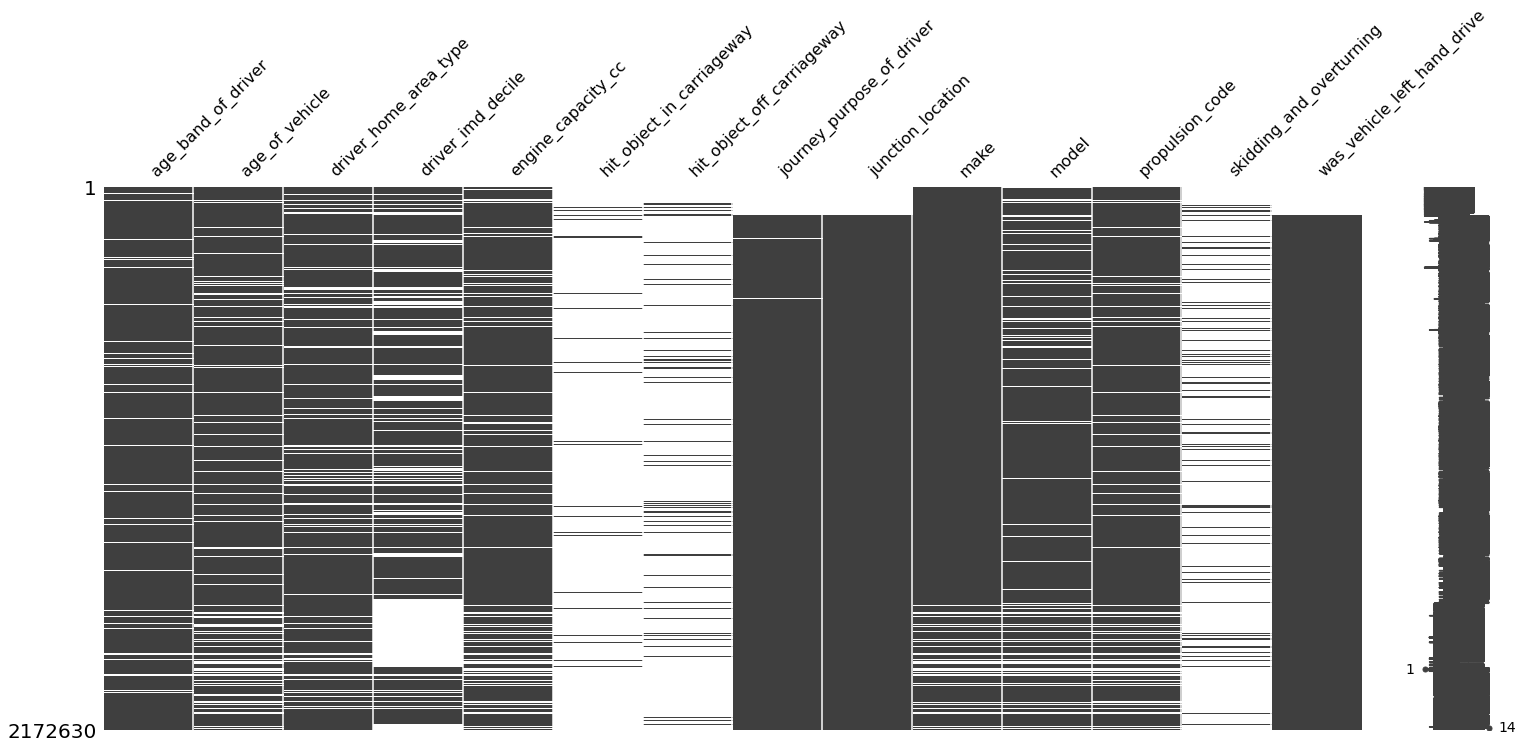

In [ ]:
# Visualizing missing values matrix
data_missing = data[data.columns[data.isnull().any()]]  # only missing features
msno.matrix(data_missing)
plt.show()

'journey_purpose_of_driver', 'junction_location' and 'was_vehicle_left_hand_drive' has almost common missing value observations.

# Handling Missing Values

In [ ]:
# Dropping 'hit_object_in_carriageway', 'hit_object_off_carriageway', and 'skidding_and_overturning'
data.drop(columns=['hit_object_in_carriageway', 'hit_object_off_carriageway', 'skidding_and_overturning'], axis=1, inplace=True)

In [ ]:
view_missing(data)

,Columns,% Missing,# Missing
0,driver_imd_decile,33.70,73227900
1,age_of_vehicle,16.40,35628500
2,driver_home_area_type,15.30,33235800
3,model,14.89,32350900
4,engine_capacity_cc,12.16,26411000
5,propulsion_code,11.24,24414100
6,age_band_of_driver,7.80,16955400
7,journey_purpose_of_driver,6.07,13196000
8,was_vehicle_left_hand_drive,5.79,12569600
9,junction_location,5.54,12031400


### Defining a function for mean/median/mode imputation and comparing the distribution

In [ ]:
# Function for imputing and checking distribution
def param_impute_and_check(data, col, xlimits=False, range=(0,0)):
    """
        To plot and check difference in distributions after missing value imputation

    data (pd.DataFrame): Dataset
    col (str): Column name
    xlimits (bool): Enable x-axis limits
    range (tuple): X-axis limit values

    Author: Retin P Kumar
    """
    try:
        data1 = data.copy()
        # Calculating mode
        colmode = data[col].mode()[0]
        # Calculating mean
        colmean = data[col].mean()
        # Calculating median
        colmedian = data[col].median()
        # Plotting the distributions
        plt.figure(figsize=(18,4))
        # Plot 1
        plt.subplot(1,3,1)
        # Imputing mode
        data1[col].fillna(colmode, inplace=True)
        sns.kdeplot(data=data1, x=col, color='red', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        sns.kdeplot(data=data, x=col, color='green', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        plt.ylabel('')
        plt.title("Mode Imputation")
        plt.legend(['Imputed','Original'])
        # Plot 2
        plt.subplot(1,3,2)
        data1 = data.copy()
        # Imputing mean
        data1[col].fillna(colmean, inplace=True)
        sns.kdeplot(data=data1, x=col, color='red', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        sns.kdeplot(data=data, x=col, color='green', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        plt.ylabel('')
        plt.title("Mean Imputation")
        plt.legend(['Imputed','Original'])
        # Plot 3
        plt.subplot(1,3,3)
        data1 = data.copy()
        # Imputing median
        data1[col].fillna(colmedian, inplace=True)
        sns.kdeplot(data=data1, x=col, color='red', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        sns.kdeplot(data=data, x=col, color='green', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        plt.ylabel('')
        plt.title("Median Imputation")
        plt.legend(['Imputed','Original'])
        plt.tight_layout()
    except:
        # Imputing mode
        print("Missing values imputed with Mode\n")
        data1[col].fillna(colmode, inplace=True)
        df1 = 100*data[col].value_counts(normalize=True).to_frame().rename(columns={col: 'Original (%)'})
        df2 = 100*data1[col].value_counts(normalize=True).to_frame().rename(columns={col: 'Imputed (%)'})
        df3 = pd.concat([df1,df2], axis=1).apply(lambda x: np.round(x,2))
        df3['Change (%)'] = df3['Imputed (%)'] - df3['Original (%)']
        return df3

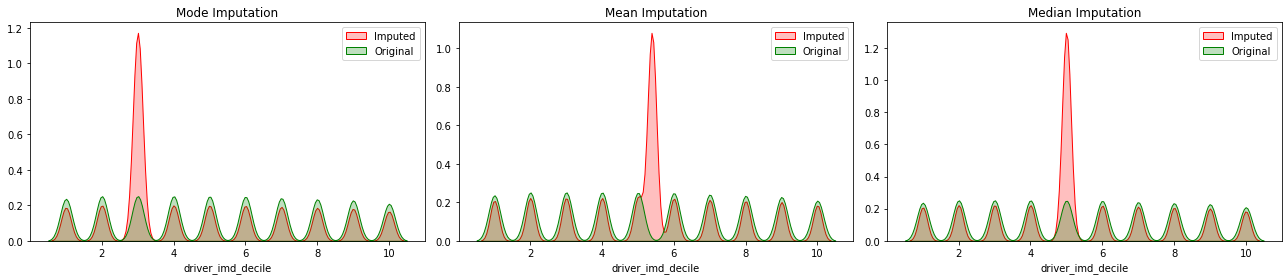

In [ ]:
# Analyzing 'driver_imd_decile'
param_impute_and_check(data=data, col='driver_imd_decile')

Clearly, we can see that mean/median/mode imputation does not work. As we do not have a target feature, we cannot make use of it to find a value either. Hence, we can either use model imputation or drop the missing values.

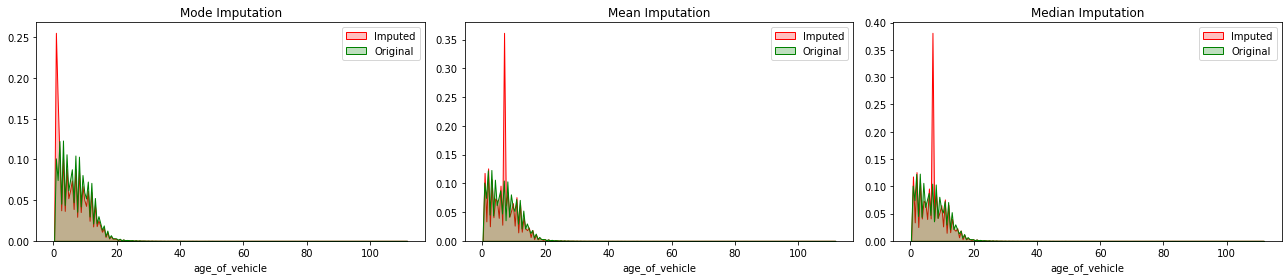

In [ ]:
# Analyzing 'age_of_vehicle'
param_impute_and_check(data=data, col='age_of_vehicle')

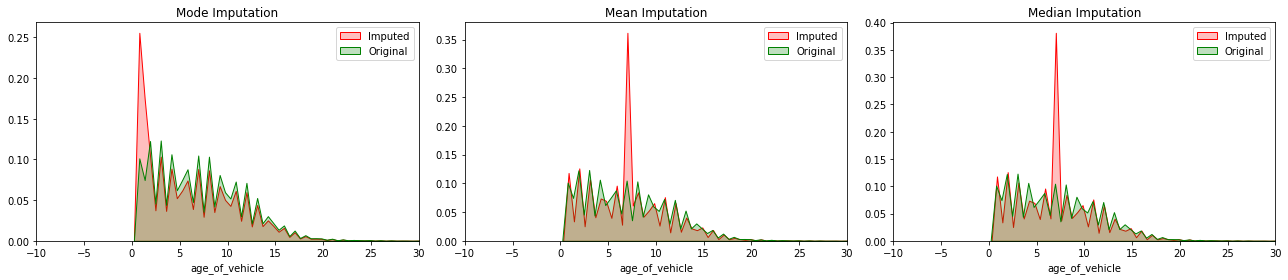

In [ ]:
# Closer look of the distribution
param_impute_and_check(data=data, col='age_of_vehicle', xlimits=True, range=(-10, 30))

Clearly, we can see that mean/median/mode imputation does not work. As we do not have a target feature, we cannot make use of it to find a value either. Hence, we can either use model imputation or drop the missing values.

In [ ]:
# Analyzing 'driver_home_area_type'
param_impute_and_check(data=data, col='driver_home_area_type')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
Urban area,77.94,81.31,3.37
Rural,12.62,10.69,-1.93
Small town,9.44,8.00,-1.44


There is only a 1.5 to 3.5% change in the distribution and hence the missing values in 'driver_home_area_type' can be imputed using its mode.

In [ ]:
# Imputing 'driver_home_area_type' using mode
driver_home_area_type_mode = data['driver_home_area_type'].mode()[0]
data['driver_home_area_type'].fillna(driver_home_area_type_mode, inplace=True)

In [ ]:
# Analyzing 'model'
param_impute_and_check(data=data, col='model')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
MISSING,0.64,15.43,14.79
CLIO DYNAMIQUE 16V,0.44,0.38,-0.06
PUNTO ACTIVE,0.29,0.25,-0.04
TRANSIT 350 LWB TD,0.24,0.21,-0.03
KA,0.24,0.21,-0.03
...,...,...,...
QASHQAI N-TEC + DCI 4X4,0.00,0.00,0.00
QASHQAI N-TEC + 2 DCI 4WD,0.00,0.00,0.00
QASHQAI BLACK EDITION DCI,0.00,0.00,0.00
QASHQAI ACENTA+2 DCI4WD A,0.00,0.00,0.00


There is a 14% change that can be noticed. But as the class is named "MISSING", we can try to see if dropping this class alongwith the missing values will create any significant change in the class distribution.

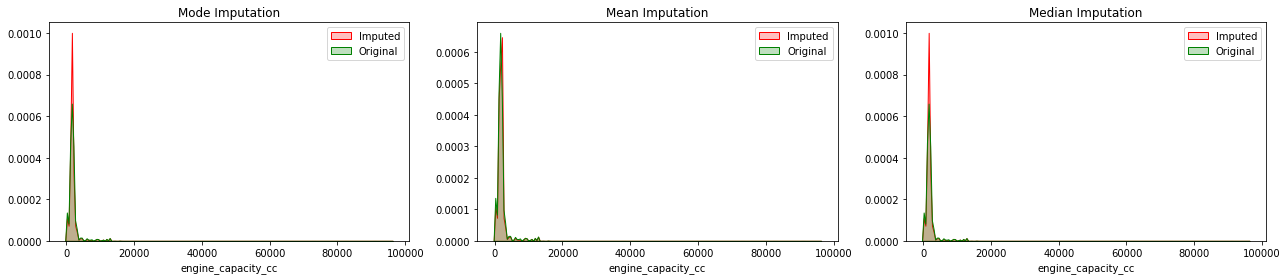

In [ ]:
# Analyzing 'engine_capacity_cc'
param_impute_and_check(data=data, col='engine_capacity_cc')

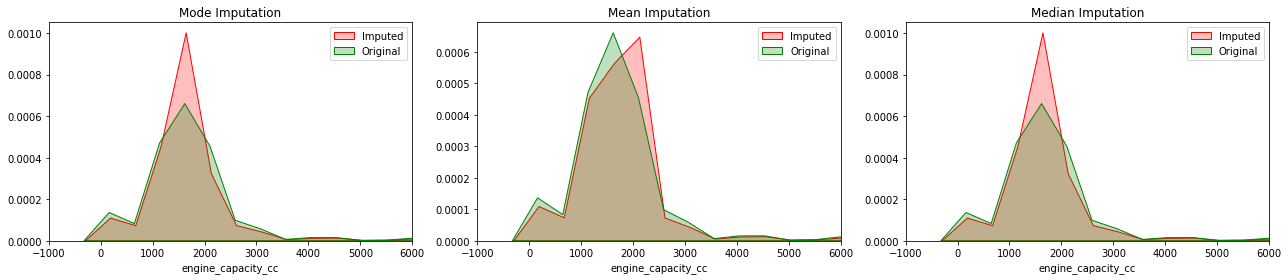

In [ ]:
# Closer look of the distribution
param_impute_and_check(data=data, col='engine_capacity_cc', xlimits=True, range=(-1000, 6000))

Mean imputation is best suited for 'engine_capacity_cc' as there is only a minute change in the distribution after imputation, which could be ignored.

In [ ]:
# Imputing 'engine_capacity_cc' using mean
engine_capacity_cc_mean = data['engine_capacity_cc'].mean()
data['engine_capacity_cc'].fillna(engine_capacity_cc_mean, inplace=True)

In [ ]:
# Analyzing 'propulsion_code'
param_impute_and_check(data=data, col='propulsion_code')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
Petrol,59.18,63.77,4.59
Heavy oil,40.18,35.66,-4.52
Hybrid electric,0.47,0.42,-0.05
Gas/Bi-fuel,0.09,0.08,-0.01
Petrol/Gas (LPG),0.03,0.03,0.00
Electric,0.03,0.03,0.00
Gas,0.01,0.01,0.00
Electric diesel,0.01,0.01,0.00
New fuel technology,0.00,0.00,0.00
Gas Diesel,0.00,0.00,0.00


There is only a 4% change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'propulsion_code'

In [ ]:
# Imputing 'propulsion_code' using mode
propulsion_code_mode = data['propulsion_code'].mode()[0]
data['propulsion_code'].fillna(propulsion_code_mode, inplace=True)

In [ ]:
# Analyzing 'age_band_of_driver'
param_impute_and_check(data=data, col='age_band_of_driver')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
26 - 35,22.45,28.51,6.06
36 - 45,21.71,20.02,-1.69
46 - 55,17.39,16.03,-1.36
21 - 25,11.90,10.97,-0.93
56 - 65,10.28,9.48,-0.80
16 - 20,8.76,8.08,-0.68
66 - 75,4.56,4.21,-0.35
Over 75,2.70,2.49,-0.21
11 - 15,0.18,0.17,-0.01
6 - 10,0.04,0.04,0.00


There is only a 6% change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'age_band_of_driver'

In [ ]:
# Imputing 'age_band_of_driver' using mode
age_band_of_driver_mode = data['age_band_of_driver'].mode()[0]
data['age_band_of_driver'].fillna(age_band_of_driver_mode, inplace=True)

In [ ]:
# Analyzing 'journey_purpose_of_driver'
param_impute_and_check(data=data, col='journey_purpose_of_driver')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
Not known,40.78,44.38,3.60
Other/Not known (2005-10),27.23,25.57,-1.66
Journey as part of work,19.19,18.02,-1.17
Commuting to/from work,9.92,9.32,-0.60
Other,1.61,1.51,-0.10
Taking pupil to/from school,1.07,1.00,-0.07
Pupil riding to/from school,0.21,0.20,-0.01


There is only a 3% change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'journey_purpose_of_driver'

In [ ]:
# Imputing 'journey_purpose_of_driver' using mode
journey_purpose_of_driver_mode = data['journey_purpose_of_driver'].mode()[0]
data['journey_purpose_of_driver'].fillna(journey_purpose_of_driver_mode, inplace=True)

In [ ]:
# Analyzing 'was_vehicle_left_hand_drive'
param_impute_and_check(data=data, col='was_vehicle_left_hand_drive')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
No,99.81,99.82,0.01
Yes,0.19,0.18,-0.01


There is almost no change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'was_vehicle_left_hand_drive'

In [ ]:
# Imputing 'was_vehicle_left_hand_drive' using mode
was_vehicle_left_hand_drive_mode = data['was_vehicle_left_hand_drive'].mode()[0]
data['was_vehicle_left_hand_drive'].fillna(was_vehicle_left_hand_drive_mode, inplace=True)

In [ ]:
# Analyzing 'junction_location'
param_impute_and_check(data=data, col='junction_location')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
Not at or within 20 metres of junction,39.31,42.67,3.36
Approaching junction or waiting/parked at junction approach,23.21,21.93,-1.28
Mid Junction - on roundabout or on main road,20.61,19.47,-1.14
Cleared junction or waiting/parked at junction exit,5.55,5.25,-0.30
Entering main road,4.37,4.13,-0.24
Entering roundabout,2.65,2.51,-0.14
Leaving main road,2.49,2.35,-0.14
Leaving roundabout,1.41,1.33,-0.08
Entering from slip road,0.38,0.36,-0.02


There is only a 3% change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'journey_purpose_of_driver'

In [ ]:
# Imputing 'junction_location' using mode
junction_location_mode = data['junction_location'].mode()[0]
data['junction_location'].fillna(junction_location_mode, inplace=True)

In [ ]:
# Analyzing 'make'
param_impute_and_check(data=data, col='make')

Missing values imputed with Mode



,Original (%),Imputed (%),Change (%)
VAUXHALL,11.60,16.05,4.45
FORD,11.48,10.90,-0.58
PEUGEOT,6.13,5.82,-0.31
VOLKSWAGEN,5.85,5.55,-0.30
RENAULT,5.53,5.25,-0.28
...,...,...,...
CASAL,0.00,0.00,0.00
JOHN ALLEN,0.00,0.00,0.00
SCUTUM,0.00,0.00,0.00
CTM,0.00,0.00,0.00


There is only a 4% change in the highest class distribution which could be ignored and hence, we can move ahead with mode imputation for 'journey_purpose_of_driver'

In [ ]:
# Imputing 'make' using mode
make_mode = data['make'].mode()[0]
data['make'].fillna(make_mode, inplace=True)

In [ ]:
# Checking missing values
view_missing(data)

,Columns,% Missing,# Missing
0,driver_imd_decile,33.70,73227900
1,age_of_vehicle,16.40,35628500
2,model,14.89,32350900


Dropping 'driver_imd_decile' as it might not be an important feature.

In [ ]:
# Dropping 'driver_imd_decile'
data.drop(columns=['driver_imd_decile'], axis=1, inplace=True)

In [ ]:
# Checking missing values
view_missing(data)

,Columns,% Missing,# Missing
0,age_of_vehicle,16.40,35628500
1,model,14.89,32350900


## Imputing 'age_of_vehicle' using Random Sample imputation.

In [ ]:
# Function for Random Sample Imputation
def random_sample_imputation(data, col):
    data1 = data.copy()
    # Generating random samples
    random_sample = data1[col].dropna().sample(data1[col].isnull().sum(), random_state=0)
    # Fetching index of missing values for random sample imputation
    random_sample.index = data1[data1[col].isnull()].index
    new_col = f"{col}_random"
    data1.loc[data1[col].isnull(), new_col] = random_sample
    # Imputing
    data1[new_col] = data1[col].fillna(random_sample)
    data1.drop(columns=[col], axis=1, inplace=True)
    data1.rename(columns={new_col: col}, inplace=True)
    return data1

In [ ]:
# Function for random sample imputing and checking distribution
def random_sample_impute_and_check(data, col, xlimits=False, range=(0,0)):
    data1 = data.copy()
    new_col = f"{col}_random"
    # Generating random samples
    random_sample = data1[col].dropna().sample(data1[col].isnull().sum(), random_state=0)
    # Fetching index of missing values for random sample imputation
    random_sample.index = data1[data1[col].isnull()].index
    data1.loc[data1[col].isnull(), new_col] = random_sample
    # Imputing
    data1[new_col] = data1[col].fillna(random_sample)
    if data[col].dtypes in ['int64', 'float64']:
        # Plotting the distributions
        sns.kdeplot(data=data1, x=col, color='red', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        sns.kdeplot(data=data, x=col, color='green', shade=True)
        if xlimits:
            plt.xlim(range[0], range[1])
        plt.ylabel('')
        plt.title("Mode Imputation")
        plt.legend(['Imputed','Original'])
        plt.tight_layout()
    else:
        # Imputing mode
        print("Random Sample Imputation\n")
        df1 = 100*data[col].value_counts(normalize=True).to_frame().rename(columns={col: 'Original (%)'})
        df2 = 100*data1[col].value_counts(normalize=True).to_frame().rename(columns={col: 'Imputed (%)'})
        df3 = pd.concat([df1,df2], axis=1).apply(lambda x: np.round(x,2))
        df3['Change (%)'] = df3['Imputed (%)'] - df3['Original (%)']
        return df3

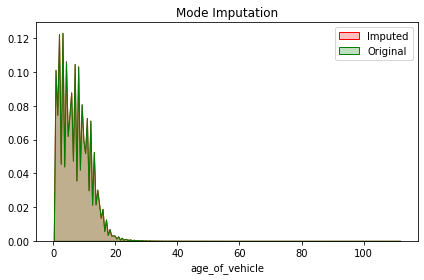

In [ ]:
# Checking the distribution after imputation
random_sample_impute_and_check(data, 'age_of_vehicle')

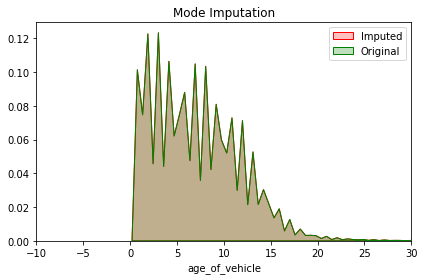

In [ ]:
# A closer look
random_sample_impute_and_check(data, 'age_of_vehicle', xlimits=True, range=(-10, 30))

There is not much difference in distribution observed after random sample imputation for 'age_of_vehicle'. Hence proceeding with the imputation.

In [ ]:
# Imputing
data = random_sample_imputation(data=data, col='age_of_vehicle')
data['age_of_vehicle'].isnull().sum()

0

## Imputing 'model' using Random Sample imputation.

In [ ]:
data['model'].value_counts().head()

MISSING               11815
CLIO DYNAMIQUE 16V     8178
PUNTO ACTIVE           5341
TRANSIT 350 LWB TD     4506
KA                     4486
Name: model, dtype: int64

In [ ]:
# Dropping "MISSING" class from model
data['model'] = np.where(data['model']=='MISSING', np.nan, data['model'])

In [ ]:
data['model'].value_counts().head()

CLIO DYNAMIQUE 16V    8178
PUNTO ACTIVE          5341
TRANSIT 350 LWB TD    4506
KA                    4486
206 LX                4252
Name: model, dtype: int64

In [ ]:
# Checking the distribution after imputation
random_sample_impute_and_check(data, 'model')

Random Sample Imputation



,Original (%),Imputed (%),Change (%)
CLIO DYNAMIQUE 16V,0.45,0.45,0.0
PUNTO ACTIVE,0.29,0.29,0.0
TRANSIT 350 LWB TD,0.25,0.25,0.0
KA,0.24,0.24,0.0
206 LX,0.23,0.23,0.0
...,...,...,...
RG 125 UN,0.00,0.00,0.0
CAVALIER CLUB AUTO,0.00,0.00,0.0
LTM1060-3.1,0.00,0.00,0.0
XT 1200 ZE SUPER TENERE,0.00,0.00,0.0


There is not much difference in distribution observed after random sample imputation for 'age_of_vehicle'. Hence proceeding with the imputation.



In [ ]:
# Imputing
data = random_sample_imputation(data=data, col='model')
data['model'].isnull().sum()

0

# Feature Analysis

In [ ]:
# Extracting Numerical data
numdf = data.select_dtypes(include='number')
print(numdf.shape)
numdf.head(3)

(2172630, 5)


,engine_capacity_cc,vehicle_location_restricted_lane,vehicle_reference,year,age_of_vehicle
0,1588.000000,0.0,2,2004,3.0
1,2042.155992,0.0,1,2004,7.0
2,998.000000,0.0,1,2004,4.0


In [ ]:
# Extracting Categorical data
catdf = data.select_dtypes(exclude='number')
print(catdf.shape)
catdf.head(3)

(2172630, 15)


,accident_index,age_band_of_driver,driver_home_area_type,journey_purpose_of_driver,junction_location,make,propulsion_code,sex_of_driver,towing_and_articulation,vehicle_leaving_carriageway,vehicle_manoeuvre,vehicle_type,was_vehicle_left_hand_drive,first_point_of_impact,model
0,200401BS00001,26 - 35,Urban area,Not known,Not at or within 20 metres of junction,ROVER,Petrol,Male,No tow/articulation,Did not leave carriageway,Going ahead other,109,No,Front,45 CLASSIC 16V
1,200401BS00002,26 - 35,Urban area,Not known,Not at or within 20 metres of junction,BMW,Petrol,Male,No tow/articulation,Did not leave carriageway,Going ahead other,109,No,Front,C1
2,200401BS00003,26 - 35,Urban area,Not known,Not at or within 20 metres of junction,NISSAN,Petrol,Male,No tow/articulation,Did not leave carriageway,Turning right,109,No,Front,MICRA CELEBRATION 16V


# Visualizing Numerical Features

### engine_capacity_cc

,count,mean,std,min,25%,50%,75%,max
engine_capacity_cc,2172630.0,2042.155992,1827.725652,1.0,1360.0,1796.0,2042.155992,96000.0


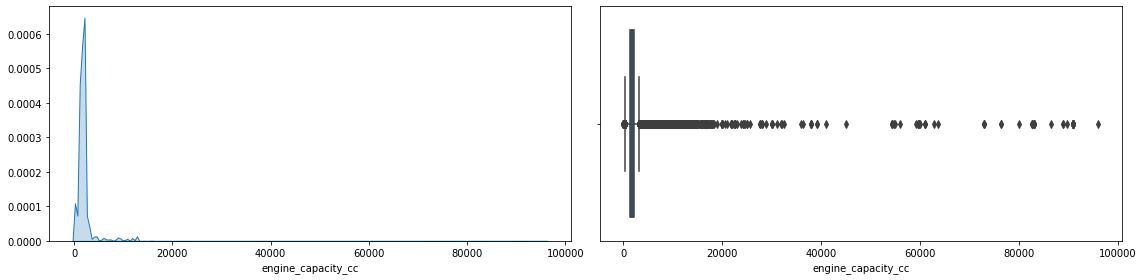

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(data=numdf, x='engine_capacity_cc', shade=True)
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=numdf, x='engine_capacity_cc')
plt.tight_layout()
numdf['engine_capacity_cc'].describe().to_frame().T

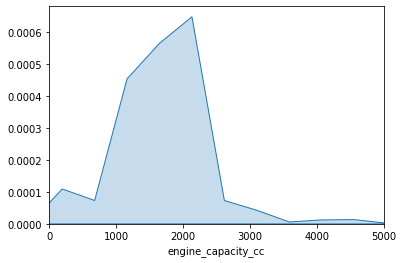

In [ ]:
sns.kdeplot(data=numdf, x='engine_capacity_cc', shade=True)
plt.xlim(-10, 5000)
plt.ylabel('')
plt.show()

Most of the vehicles have an engine capacity around 2500 cc. But there are quite a number of outliers which could be due to error while recording the data or may be due to some high power trucks/trains.


### vehicle_location_restricted_lane

,count,mean,std,min,25%,50%,75%,max
vehicle_location_restricted_lane,2172630.0,0.107239,0.879752,0.0,0.0,0.0,0.0,9.0


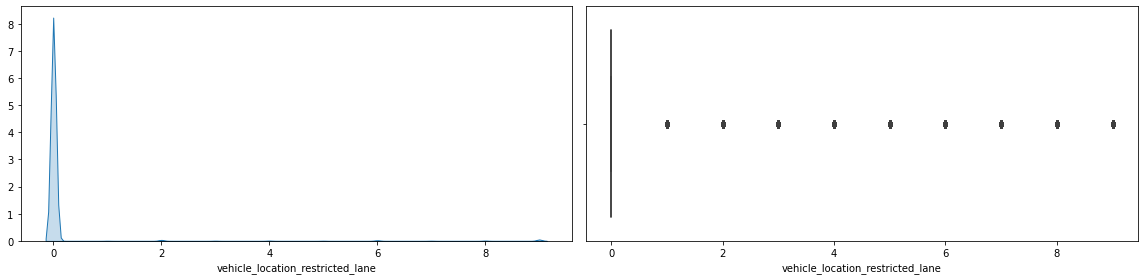

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(data=numdf, x='vehicle_location_restricted_lane', shade=True)
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=numdf, x='vehicle_location_restricted_lane')
plt.tight_layout()
numdf['vehicle_location_restricted_lane'].describe().to_frame().T

Most of the accidents happened in vehicle location restricted lane 0.

### vehicle_reference

,count,mean,std,min,25%,50%,75%,max
vehicle_reference,2172630.0,1.553513,0.775348,1.0,1.0,1.0,2.0,91.0


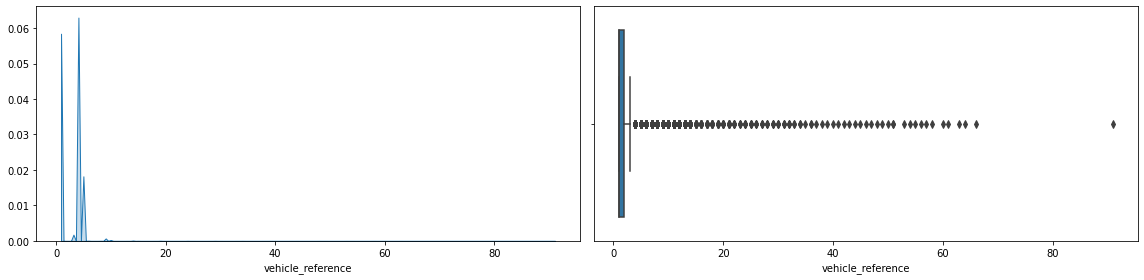

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(data=numdf, x='vehicle_reference', shade=True)
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=numdf, x='vehicle_reference')
plt.tight_layout()
numdf['vehicle_reference'].describe().to_frame().T

### year

,count,mean,std,min,25%,50%,75%,max
year,2172630.0,2010.933169,3.68934,2004.0,2008.0,2011.0,2014.0,2016.0


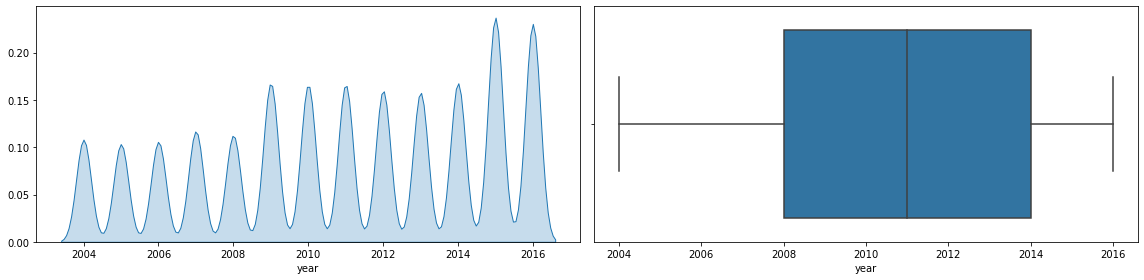

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(data=numdf, x='year', shade=True)
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=numdf, x='year')
plt.tight_layout()
numdf['year'].describe().to_frame().T

We see an increasing trend in the number of accidents. Also, most of the recorded accidents happened in 2015.

### age_of_vehicle

,count,mean,std,min,25%,50%,75%,max
age_of_vehicle,2172630.0,7.109915,4.727105,1.0,3.0,7.0,10.0,111.0


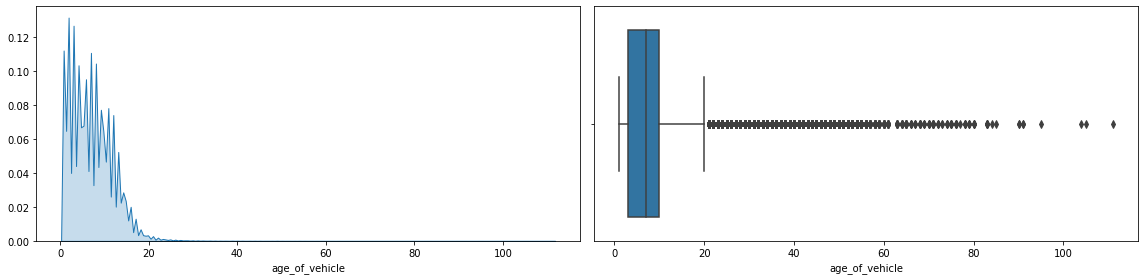

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(data=numdf, x='age_of_vehicle', shade=True)
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(data=numdf, x='age_of_vehicle')
plt.tight_layout()
numdf['age_of_vehicle'].describe().to_frame().T

Most of the vehicles are aged less than 20yrs.

# Visualizing Categorical Features

### accident_index

In [ ]:
catdf['accident_index'].describe().to_frame().T

,count,unique,top,freq
accident_index,2172630,1486281,2013460234852,53


In [ ]:
100*catdf['accident_index'].value_counts().head(10)/data.shape[0]

2013460234852    0.002439
201543P296025    0.001703
2011160B00431    0.001105
2009559D05333    0.001013
2016140142191    0.000736
201522D501706    0.000736
200911NE16289    0.000644
2015460257544    0.000644
2015984141415    0.000598
2016460044087    0.000598
Name: accident_index, dtype: float64

There is not much concentration of data points over any particular class and considering this as an index data, this could be dropped.

### age_band_of_driver

In [ ]:
catdf['age_band_of_driver'].describe().to_frame().T

,count,unique,top,freq
age_band_of_driver,2172630,11,26 - 35,619311


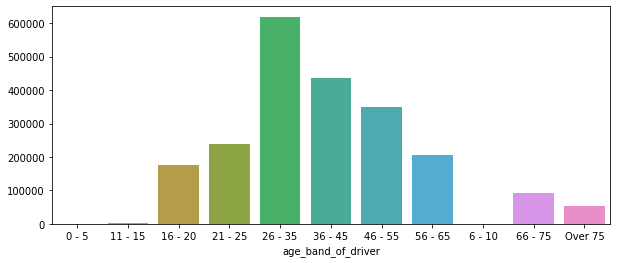

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, x='age_band_of_driver')
plt.ylabel("")
plt.show()

Most of the accidents were caused by drivers between 26 and 35 yrs of age with even few of them between 11 to 15 and some over 75 yrs of age.

### driver_home_area_type

In [ ]:
catdf['driver_home_area_type'].describe().to_frame().T

,count,unique,top,freq
driver_home_area_type,2172630,3,Urban area,1766663


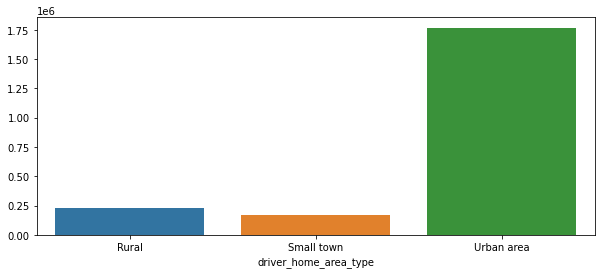

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, x='driver_home_area_type')
plt.ylabel("")
plt.show()

Most of the drivers were from Urban area and almost equal number of drivers came from Rural area or Small town.

### journey_purpose_of_driver

In [ ]:
catdf['journey_purpose_of_driver'].describe().to_frame().T

,count,unique,top,freq
journey_purpose_of_driver,2172630,7,Not known,964128


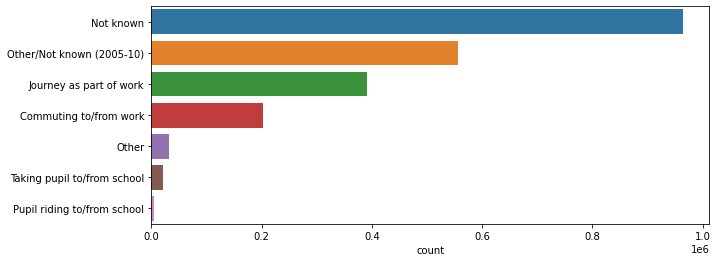

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='journey_purpose_of_driver', order=catdf['journey_purpose_of_driver'].value_counts().index)
plt.ylabel("")
plt.show()

Majority of the data regarding the journey purpose of the driver is not known. But, of the known ones, most of the accidents happened due to work related commute.

### junction_location

In [ ]:
catdf['junction_location'].describe().to_frame().T

,count,unique,top,freq
junction_location,2172630,9,Not at or within 20 metres of junction,927136


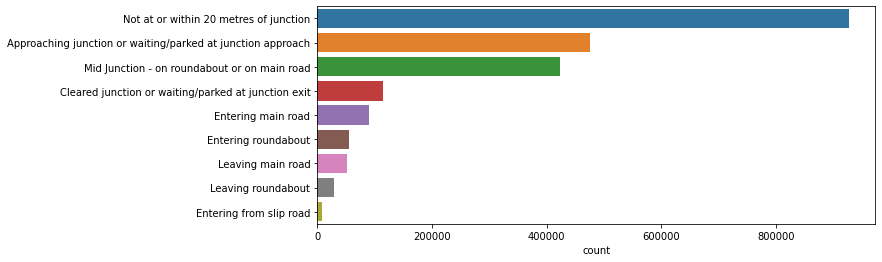

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='junction_location', order=catdf['junction_location'].value_counts().index)
plt.ylabel("")
plt.show()

Most of the accidents happened away from the junction and mostly while approaching the junction.

### make

In [ ]:
catdf['make'].describe().to_frame().T

,count,unique,top,freq
make,2172630,535,VAUXHALL,348815


In [ ]:
100*catdf['make'].value_counts().head(10)/data.shape[0]

VAUXHALL      16.054966
FORD          10.897622
PEUGEOT        5.816821
VOLKSWAGEN     5.553085
RENAULT        5.253587
HONDA          4.737944
MERCEDES       4.128269
TOYOTA         3.841289
CITROEN        3.760051
NISSAN         3.274833
Name: make, dtype: float64

In [ ]:
(100*catdf['make'].value_counts().head(10)/data.shape[0]).values.sum()

63.3184665589631

Top 10 classes for vehicle make comprises of almost 63% of the distribution. Hence we can classify all other classes into a common class.

### propulsion_code

In [ ]:
catdf['propulsion_code'].describe().to_frame().T

,count,unique,top,freq
propulsion_code,2172630,12,Petrol,1385450


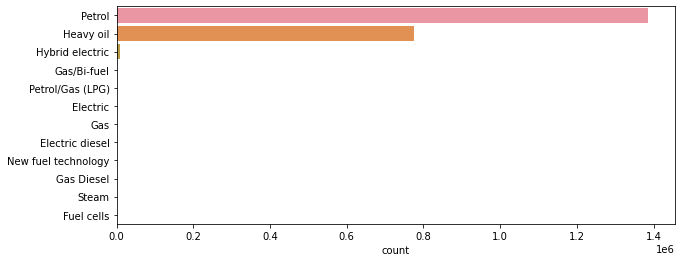

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='propulsion_code', order=catdf['propulsion_code'].value_counts().index)
plt.ylabel("")
plt.show()

The distribution is very much biased towards Petrol and Heavy Oil, that any sampling techniques with the existing data will not help. Hence, it would be better to drop this feature.

### sex_of_driver

In [ ]:
catdf['sex_of_driver'].describe().to_frame().T

,count,unique,top,freq
sex_of_driver,2172630,3,Male,1465445


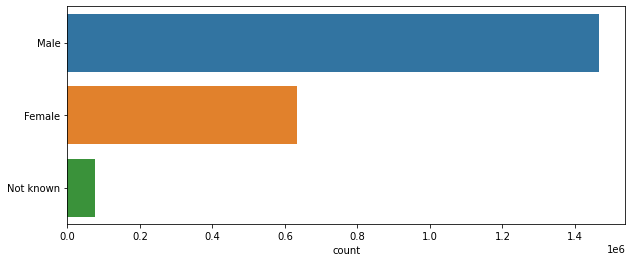

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='sex_of_driver', order=catdf['sex_of_driver'].value_counts().index)
plt.ylabel("")
plt.show()

Most of the drivers that caused accidents were Males.

### towing_and_articulation

In [ ]:
catdf['towing_and_articulation'].describe().to_frame().T

,count,unique,top,freq
towing_and_articulation,2172630,6,No tow/articulation,2133046


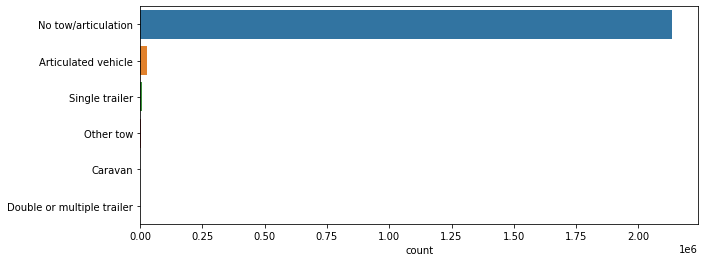

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='towing_and_articulation', order=catdf['towing_and_articulation'].value_counts().index)
plt.ylabel("")
plt.show()

Almost all of the vehicles in the dataset were not articulated/towed. This is a highly imbalanced feature and could be considered for dropping.

### vehicle_leaving_carriageway

In [ ]:
catdf['vehicle_leaving_carriageway'].describe().to_frame().T

,count,unique,top,freq
vehicle_leaving_carriageway,2172630,9,Did not leave carriageway,1919658


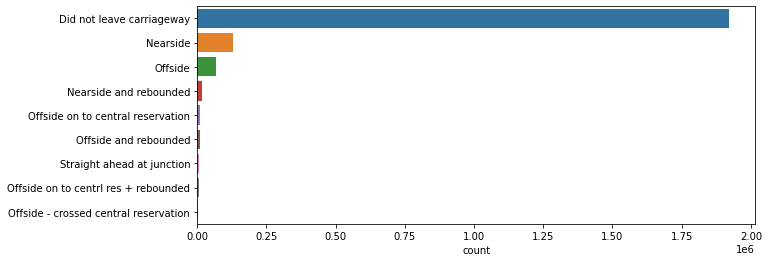

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='vehicle_leaving_carriageway', order=catdf['vehicle_leaving_carriageway'].value_counts().index)
plt.ylabel("")
plt.show()

Most of the vehicles did not leave the carriageway. Other classes could be combined together, but even then the feature would remain highly imbalanced and hence could be considered for dropping.

### vehicle_manoeuvre

In [ ]:
catdf['vehicle_manoeuvre'].describe().to_frame().T

,count,unique,top,freq
vehicle_manoeuvre,2172630,18,Going ahead other,992959


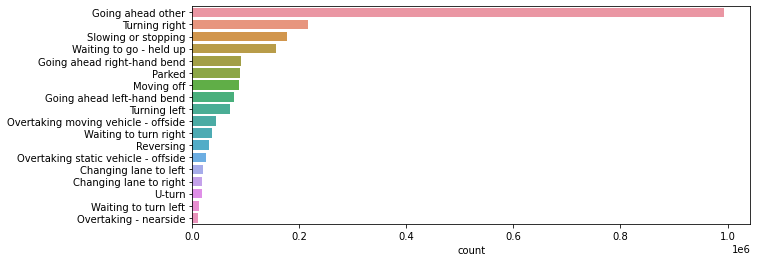

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='vehicle_manoeuvre', order=catdf['vehicle_manoeuvre'].value_counts().index)
plt.ylabel("")
plt.show()

Most of the vehicles that met with the accident were trying to get ahead of the vehicle in the near lane (not overtaking).

### vehicle_type

In [ ]:
catdf['vehicle_type'].describe().to_frame().T

,count,unique,top,freq
vehicle_type,2172630,23,Car,1526728


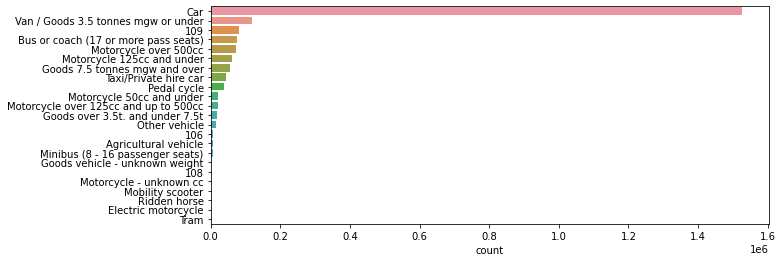

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='vehicle_type', order=catdf['vehicle_type'].value_counts().index)
plt.ylabel("")
plt.show()

Majority of the accidents were caused by car and comparitively few had buses or vans or even motorcycles.

### was_vehicle_left_hand_drive

In [ ]:
catdf['was_vehicle_left_hand_drive'].describe().to_frame().T

,count,unique,top,freq
was_vehicle_left_hand_drive,2172630,2,No,2168752


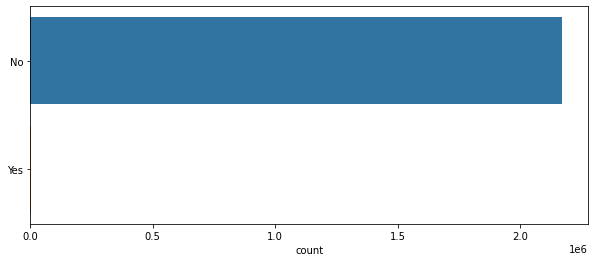

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='was_vehicle_left_hand_drive', order=catdf['was_vehicle_left_hand_drive'].value_counts().index)
plt.ylabel("")
plt.show()

Almost all of the vehicle were right hand driven vehicle.

### first_point_of_impact

In [ ]:
catdf['first_point_of_impact'].describe().to_frame().T

,count,unique,top,freq
first_point_of_impact,2172630,5,Front,1059506


Most accidents had the front side of the vehicle as the first point of contact

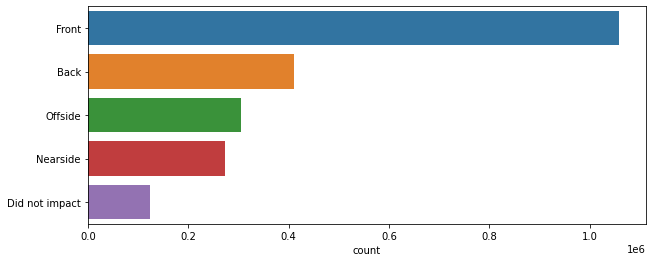

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=catdf, y='first_point_of_impact', order=catdf['first_point_of_impact'].value_counts().index)
plt.ylabel("")
plt.show()

### model

In [ ]:
catdf['model'].describe().to_frame().T

,count,unique,top,freq
model,2172630,35704,CLIO DYNAMIQUE 16V,9666


'CLIO DYNAMIQUE' is the vehicle model that met with most of the accidents.

In [ ]:
100*catdf['model'].value_counts().head(10)/data.shape[0]

CLIO DYNAMIQUE 16V    0.444899
PUNTO ACTIVE          0.289649
KA                    0.246337
TRANSIT 350 LWB TD    0.244450
206 LX                0.231931
PUNTO ACTIVE 8V       0.223324
SPRINTER 313 CDI      0.203486
FIESTA ZETEC          0.183142
KA STYLE              0.182820
206 LOOK              0.182544
Name: model, dtype: float64

# Some Questions

### What is the age band of drivers that drove most powerful vehicle?

In [ ]:
df1 = data.groupby('age_band_of_driver')['engine_capacity_cc'].mean()
df1

age_band_of_driver
0 - 5      2042.404976
11 - 15    1894.662190
16 - 20    1234.869986
21 - 25    1632.904910
26 - 35    2019.316861
36 - 45    2261.562633
46 - 55    2395.263691
56 - 65    2417.416303
6 - 10     2033.599094
66 - 75    1862.778322
Over 75    1575.044196
Name: engine_capacity_cc, dtype: float64

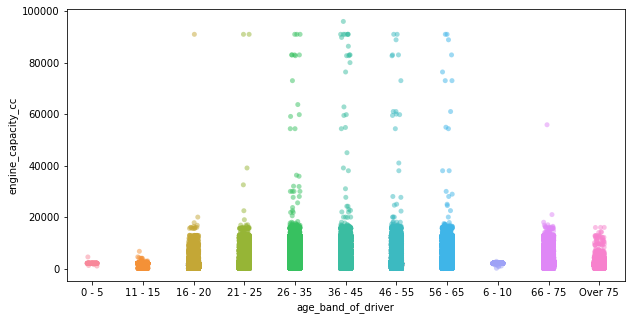

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(data=data, y='engine_capacity_cc', x='age_band_of_driver', alpha=0.5)
plt.show()

It is interesting to see that kids and babies under 5yrs of age drove vehicles with an average engine displacement of 2000cc, which is definitely erroneous. Apart from that, people aged 56-65 drove vehicles with the most engine displacement on an average.

### What is the age band of male and female drivers that met with the accident?

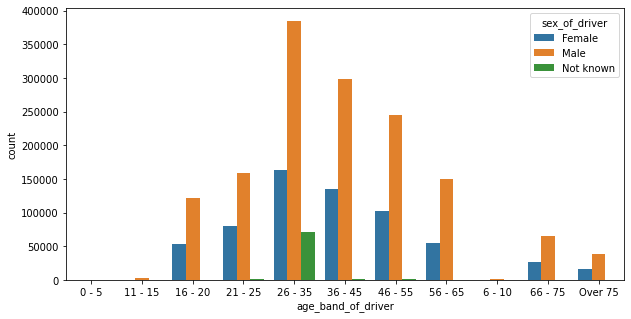

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='age_band_of_driver', hue='sex_of_driver')
plt.show()

### Were the accidents caused by Females due to driving powerful vehicles ?

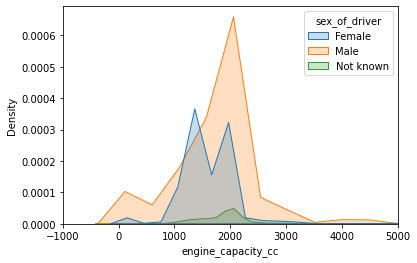

In [ ]:
sns.kdeplot(data=data, x='engine_capacity_cc', hue='sex_of_driver', shade=True)
plt.xlim(-1000, 5000)
plt.show()

Contrary to the assumption, most of the accidents caused by Females were by driving less powerful vehicles whereas the ones caused by Males were due to powerful vehicles.

### What were the journey purpose of male and female drivers?

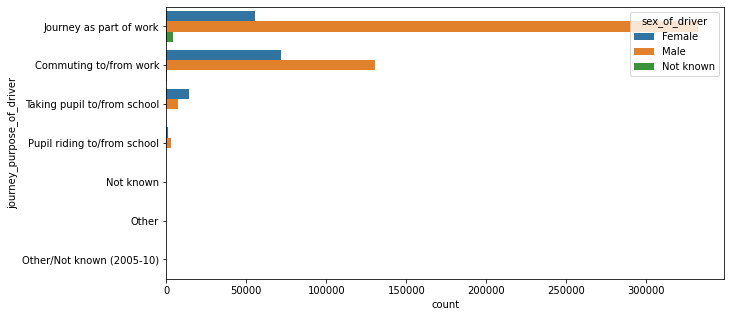

In [ ]:
data1 = data[~data['journey_purpose_of_driver'].isin(['Not known', 'Other', 'Other/Not known (2005-10)'])]
plt.figure(figsize=(10,5))
sns.countplot(data=data1, 
              y='journey_purpose_of_driver', 
              hue='sex_of_driver',
              order=data1['journey_purpose_of_driver'].value_counts().index)
plt.show()

While most accidents caused by males were due to work related commute, accidents caused by females were due to their commute to drop/pick up their children from school.
This might explain the reason why 0-5 yrs aged children were included in the age_band_of_driver which in fact is supposed to be the age band of people met with the accident.

# Visualizations in Plotly